# Transform Excel data to Powerful Dashboard

_The common entrepreneur has a simple ERP system that allows them to extract a raw data (Excel report) with columns and values. Typically, the entrepreneur takes this file and processes it daily to understand what has happened with their sales._

## Problem

Simplify the process of analyses sales data from an Excel file to a powerful dashboard in Microsoft Power BI.

## Dataset

The dataset used in this problem is a typical Excel file that export from an ERP system with these variables: 

* **Order ID:** Identifier of transactions. 

* **Customer Name**

* **Category:** Product Category.

* **Sub Category:** Subcategory product

* **City**

* **Order Date**

* **Region**

* **Sales:** Value in $ of Sale

* **Discount:** Discount percentage.

* **Profit:** Value in $ of Gross Profit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
#Load Data
data = pd.read_csv("G:/.shortcut-targets-by-id/1SNU6AKxzBtTEAum9YeqKtgoTzKPg9vZX/Creative/Solver - Tableros Comandos/Supermart Grocery Sales - Retail Analytics Dataset.csv")
data.head(3)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu


Before diving into any data analysis, it's crucial to conduct an Exploratory Data Analysis (EDA) to understand the underlying patterns, anomalies, and structures within the dataset. The EDA process involves several key steps, starting with data cleaning to handle missing values, duplicates, and inconsistencies. Next, we structure the data in a suitable format for analysis. Using tools like *_ydata_profiling_*, we generate comprehensive reports that provide insights into the distribution of variables, correlations, and potential outliers. This step ensures that the data is ready for more advanced analytical processes, setting a solid foundation for extracting meaningful insights and driving business decisions.

In [3]:
# Transform data in the correct format
data['Order Date']  = pd.to_datetime(data['Order Date'],format='mixed')

#(Optional) 
    #To ensure the information is up-to-date and provides a better perception of the current time.
df_time = datetime.now()-data['Order Date'].max()
data['Order Date'] = data['Order Date']+ df_time
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year

data.head(3)


from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

To gain an initial overview of the dataset, we examine basic statistics. This step involves calculating key metrics like mean, median, standard deviation, and frequency counts. These statistics help identify patterns and anomalies, guiding further analysis. We use data.describe(include='all').T to generate this comprehensive summary.

In [4]:
#Basic stats to analyses the whole dataset
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,9994,9994,OD1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,50,Amrish,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9994,7,Snacks,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub Category,9994,23,Health Drinks,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,24,Kanyakumari,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,NaN,NaN,NaN,2022-09-21 02:38:27.939438336,2020-05-25 21:21:19.882604,2021-10-13 21:21:19.882604032,2022-11-16 21:21:19.882604032,2023-10-04 21:21:19.882604032,2024-05-21 21:21:19.882604,NaN
Region,9994,5,West,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9994.0,NaN,NaN,NaN,1496.596158,500.0,1000.0,1498.0,1994.75,2500.0,577.559036
Discount,9994.0,NaN,NaN,NaN,0.226817,0.1,0.16,0.23,0.29,0.35,0.074636
Profit,9994.0,NaN,NaN,NaN,374.937082,25.25,180.0225,320.78,525.6275,1120.95,239.932881


### Data Process

RFM (Recency, Frequency, Monetary) analysis is a powerful method for segmenting customers based on their transaction history. By evaluating how recently a customer has made a purchase (Recency), how often they purchase (Frequency), and how much they spend (Monetary), businesses can identify valuable customer segments. This analysis helps entrepreneurs understand customer behaviors, tailor marketing strategies, and improve customer retention. Implementing RFM analysis in a sales dashboard empowers business owners to make data-driven decisions, optimize their sales strategies, and ultimately enhance profitability.

In [5]:
##RFM Process


#Define useful columns to RFM process
df_rfm = data[['Order ID', 'Customer Name','Order Date','Profit']]

# We will consider 'today's' date as the date of the last invoice plus 1 day.
snapshot_date = df_rfm['Order Date'].max() + timedelta(days=1) 

# We group by customer and review Recency, Frequency, and Monetary.
data_process_rfm = df_rfm.groupby(['Customer Name']).agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days, # Recency
    'Order ID': 'count', # Frequency
    'Profit': 'sum'}).reset_index().sort_values(by='Profit',ascending=False) # Monetary

# We rename the columns for greater clarity.
data_process_rfm.rename(columns = { 'Order Date': 'Recency',
                                    'Order ID': 'Frequency',
                                    'Profit': 'MonetaryValue'
                                  }, 
                        inplace=True)


#We divide the data into quartiles for Recency and Monetary Value.
#We use custom labels for the quartiles.

#Recency
r_labels = range(4, 0,-1)  # Descending labels for 4 quartiles.
r_quartiles = pd.qcut(data_process_rfm['Recency'], 4, labels=r_labels)

#Monetary
m_labels = range(1, 5)  # Ascending labels for the 4 quartiles.
m_quartiles = pd.qcut(data_process_rfm['MonetaryValue'], 4, labels=m_labels)

#Frequency
f_labels = range(1, 5)  # Ascending labels for the 4 quartiles
f_quartiles = pd.qcut(data_process_rfm['Frequency'], 4, labels=f_labels)


# We assign the labels to our data.
data_process_rfm = data_process_rfm.assign(R=r_quartiles.values)
data_process_rfm = data_process_rfm.assign(F=f_quartiles.values)
data_process_rfm = data_process_rfm.assign(M=m_quartiles.values)

# We calculate the RFM Score by summing the values of R, F, and M.
data_process_rfm['RFM_Score'] = data_process_rfm[['R', 'F', 'M']].sum(axis=1)

# We visualize the first records of the processed data.
data_process_rfm.head(3)


,Customer Name,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
7,Arutra,5,218,87572.40,2,4,4,10
44,Vidya,3,215,86725.64,3,4,4,11
19,Krithika,3,224,85633.03,3,4,4,11


Based on the RFM (Recency, Frequency, Monetary) score, we define three types of customers to differentiate their transactional history and assess their potential; Gold , Silver ,Bronze. This segmentation helps tailor marketing strategies to maximize the potential of each customer group.

In [6]:
#Label customer based on RFM_Score
data_process_rfm.loc[data_process_rfm['RFM_Score']>2,'Customer Type']='Bronze'
data_process_rfm.loc[data_process_rfm['RFM_Score']>5,'Customer Type']='Silver'
data_process_rfm.loc[data_process_rfm['RFM_Score']>8,'Customer Type']='Gold'
data_process_rfm.head(3)

,Customer Name,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,Customer Type
7,Arutra,5,218,87572.40,2,4,4,10,Gold
44,Vidya,3,215,86725.64,3,4,4,11,Gold
19,Krithika,3,224,85633.03,3,4,4,11,Gold


To visualize the RFM process, we use a pairplot to display the relationships between Recency, Frequency, and Monetary Value across different customer types. This graph helps us understand how these dimensions interact and how customers are segmented into Gold, Silver, and Bronze categories. By coloring the points based on customer type, we can easily see the distinct clusters and patterns that emerge from the RFM analysis.

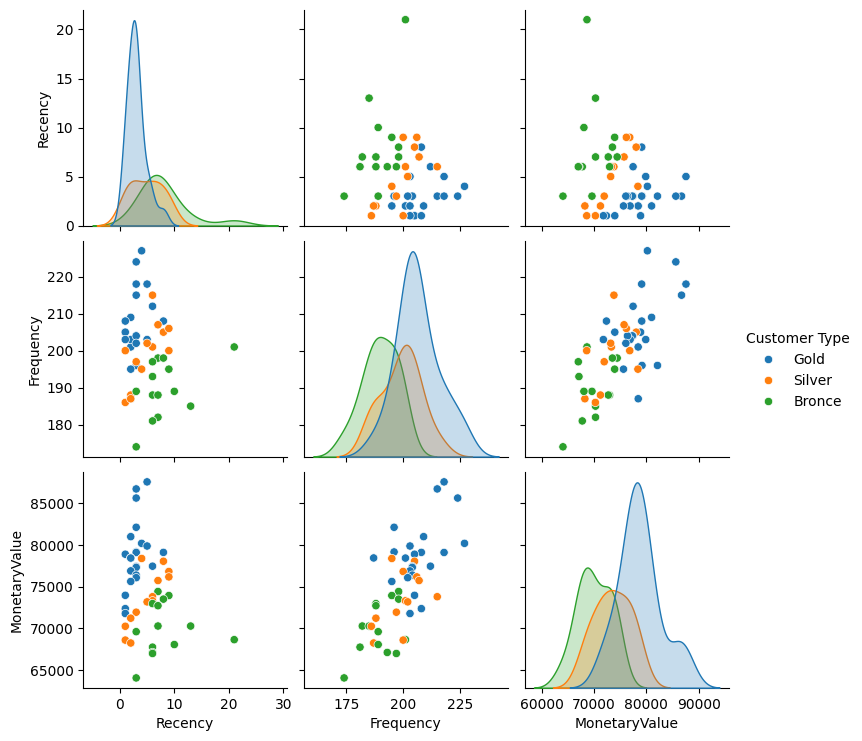

In [7]:
#Visualize the RFM process in their dimesions
sns.pairplot(data_process_rfm[['Recency','Frequency','MonetaryValue','Customer Type']], hue= 'Customer Type')

We merge the sales data with the RFM segmentation results to categorize customers as Gold, Silver, or Bronze.

In [8]:

data_export = pd.merge(data,data_process_rfm[['Customer Name','Customer Type']],left_on='Customer Name', right_on='Customer Name')
data_export.head(3)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Customer Type
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2023-03-31,North,1254,0.12,401.28,Tamil Nadu,2023,Gold
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2023-03-31,South,749,0.18,149.80,Tamil Nadu,2023,Bronce
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2022-11-02,West,2360,0.21,165.20,Tamil Nadu,2022,Gold


A calendar table is essential for time-based analysis in Power BI, enabling accurate date-based calculations and comparisons. To create a calendar table:

In [9]:
# Let's assume you already have a DataFrame called df with a 'fecha' column
# Make sure the 'fecha' column is in date format; if not, convert it using pd.to_datetime.

# Get the first and last date from the original DataFrame

date_min = data_export['Order Date'].min()
date_max = data_export['Order Date'].max()
date_max = date_max + pd.offsets.MonthEnd(0)


# Create a date range from the first date to the last date.
date_range = pd.date_range(start=date_min, end=date_max)

# Create a calendar DataFrame based on the date range.
calendar = pd.DataFrame({'date': date_range})

# Create the necessary columns in the calendar DataFrame.
calendar['Code_month'] = calendar['date'].dt.strftime('%Y%m')
calendar['Quarter'] = 'Q' + calendar['date'].dt.quarter.astype(str)
calendar['Semester'] = 'S' + calendar['date'].dt.month.apply(lambda x: 1 if x <= 6 else 2).astype(str)
calendar['Year'] = calendar['date'].dt.year
calendar['Date_LY'] = calendar['date'] - pd.DateOffset(years=1)
calendar['Week_Number'] = calendar['date'].dt.day // 7 + 1
calendar['Month'] = calendar['date'].dt.strftime('%B')
calendar['Num_month'] = calendar['date'].dt.strftime('%m')

# The 'calendar' DataFrame will now contain all the dates between the first and last dates present in your original 'Sales data'
calendar.sort_values(by='date',ascending=False,inplace=True)

calendar.head(3)


,date,Code_month,Quarter,Semester,Year,Date_LY,Week_Number,Month,Num_month
1467,2024-05-31,202405,Q2,S1,2024,2023-05-31,5,May,05
1466,2024-05-30,202405,Q2,S1,2024,2023-05-30,5,May,05
1465,2024-05-29,202405,Q2,S1,2024,2023-05-29,5,May,05


In [10]:
#Create primary tablets
City = data_export[['City']].drop_duplicates()
product = data_export[['Category', 'Sub Category']].drop_duplicates()
Region = data_export[['Region']].drop_duplicates()
City = data_export[['City']].drop_duplicates()

In [11]:
#Export tables for powerbi
product.to_csv("G:/My Drive/Personal/Portfolio - Data/Proyectos/Sales Market Viz/product.csv",index=False)
Region.to_csv("G:/My Drive/Personal/Portfolio - Data/Proyectos/Sales Market Viz/Region.csv",index=False)
City.to_csv("G:/My Drive/Personal/Portfolio - Data/Proyectos/Sales Market Viz/City.csv",index=False)
calendar.to_csv("G:/My Drive/Personal/Portfolio - Data/Proyectos/Sales Market Viz/Calendar.csv",index=False)
data_export.to_csv("G:/My Drive/Personal/Portfolio - Data/Proyectos/Sales Market Viz\Sales.csv",index=False)

# Visualizing RFM Segmentation Results

After completing the data cleaning and RFM segmentation process, we generate a visualization that categorizes customers into Gold, Silver, and Bronze segments. This visualization helps identify the distribution and behavior of different customer types, enabling targeted marketing strategies and better resource allocation. The chart provides a clear overview of customer value and engagement levels, guiding data-driven decision-making to enhance business performance.


By integrating and analyzing these segments, businesses can focus on retaining high-value customers and re-engaging lower-value ones, ultimately driving growth and profitability. To view dashboard click [here](https://app.powerbi.com/view?r=eyJrIjoiYzZlOWI3ZTItZWZiNC00NGI4LTk2MjAtMmU0ZTE1MTBkZWE0IiwidCI6IjA2YTNmZDUxLTY1MWEtNGM5OS1hYWQyLWE5ZTkxMDA4ZGQ4OCJ9)

<iframe title="Data Viz - Market" width="600" height="373.5" src="https://app.powerbi.com/view?r=eyJrIjoiYzZlOWI3ZTItZWZiNC00NGI4LTk2MjAtMmU0ZTE1MTBkZWE0IiwidCI6IjA2YTNmZDUxLTY1MWEtNGM5OS1hYWQyLWE5ZTkxMDA4ZGQ4OCJ9" frameborder="0" allowFullScreen="true"></iframe>

# Conclusion

In conclusion, transforming raw sales data into meaningful insights is crucial for any entrepreneur aiming to make data-driven decisions. By using Python for data cleaning and structuring, performing Exploratory Data Analysis (EDA) with tools like ydata_profiling, and applying RFM analysis to segment customers, we can build a powerful and insightful Power BI dashboard. This process not only simplifies daily data analysis but also provides a clear visualization of customer behavior and sales trends. With these insights, businesses can better understand their customers, optimize their strategies, and ultimately drive growth.